In [2]:
#Importacion de las librerias que vamos a necesitar

import numpy as np
import matplotlib.pyplot as plt

from keras import layers, models

#Esta libreria sirve para hacer one hot encoding

#Hay que ponerle el tensorflow.keras porque se vuelve loco
from tensorflow.keras.utils import to_categorical

from keras.datasets import mnist

In [5]:
# Carga de los datos a utilizar

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()


In [6]:
# Reconociendo que tenemos en train data

train_data.shape

(60000, 28, 28)

tenemos 60000 imagenes de 28x28

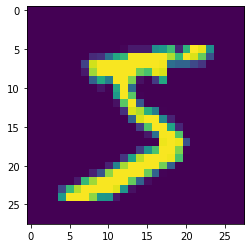

In [9]:
#Esta libreria de matplotlib nos permite visualizar imagenes que estan dentro de un dataset

plt.imshow(train_data[0])

In [8]:
#Cada posicion de train_data está asignada con su respectivo valor en train_labels

train_labels[0]

5

In [12]:
# Eleccion del modelo

model = models.Sequential()

#Ahora le tenemos que agregar capas

model.add(layers.Dense(512,activation="relu", input_shape=(28*28,)))

model.add(layers.Dense(10, activation="softmax"))
#Aqui agregamos 10 neuronas para las 10 posibles salidas 

In [13]:
#Ahora compilaremos nuestro modelo

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics="accuracy")

In [14]:
#Ahora, viendo la red maestra

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [17]:
#Haciendo una modificacion de nuestros datos

x_train = train_data.reshape((60000, 28*28))
                #Vamos a llevar los 60000 registros a un 2-dimensional tensor (estaba en 3)

x_train = x_train.astype("float32")/255
              #De igual manera lo convertimos a float y dividimos entre 255 para que nos de valores (0,1)

x_test = test_data.reshape((10000, 28*28))

x_test = x_test.astype("float32")/255

In [18]:
y_train = to_categorical(train_labels)

y_test = to_categorical(test_labels)

#Esto es para hacer one hot encoding, y no que nos de el numero como tal (5) cuando lo 
#llamamos, sino que nos da un one hot

In [22]:
print(train_labels[0])

print(y_test[0])

5
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


5

In [23]:
# Entrenameitno de nuestro modelo

model.fit(x_train, y_train, epochs=6, batch_size=128)

Epoch 1/6
469/469 [==============================] - 4s 3ms/step - loss: 0.2554 - accuracy: 0.9258
Epoch 2/6
469/469 [==============================] - 1s 3ms/step - loss: 0.1030 - accuracy: 0.9693
Epoch 3/6
469/469 [==============================] - 1s 3ms/step - loss: 0.0678 - accuracy: 0.9798
Epoch 4/6
469/469 [==============================] - 1s 3ms/step - loss: 0.0502 - accuracy: 0.9847
Epoch 5/6
469/469 [==============================] - 1s 3ms/step - loss: 0.0373 - accuracy: 0.9886
Epoch 6/6
469/469 [==============================] - 1s 3ms/step - loss: 0.0285 - accuracy: 0.9912


Vease que cada vez que entrenaba el accuracy iba subiendo y la perdida iba disminuyendo

In [27]:
resultado = model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.0673 - accuracy: 0.9790
